In [371]:
#pip install -e .

In [372]:
import numpy as np
import NeuralNetworkLibrary as dnn
import matplotlib.pyplot as plt
from scipy.io import loadmat
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import seaborn as sns

np.random.seed(42)

CLASSIFICATION // REGRESSION

In [373]:
def dataset_Class(dataClass):
    if (dataClass == "Classification"):
        return 1
    
    if(dataset_Class == "Regression"):
        return 0

    return 0

# Main

In [374]:
def main():
    dataClass = "Classification"
    if dataset_Class(dataClass) == 0 :
        neural_network = dnn.NeuralNetwork(input_size = 2,
                                    layer_sizes = [30,30,30],
                                    output_size = 2,
                                    activation_funcs = [dnn.Relu(),dnn.Relu(),dnn.Relu(),dnn.Purelin()],
                                    wInit = 'nguyen',
                                    dropout_rate=0.05,
                                    regularization='L2')

        # Carga el archivo .mat
        data = loadmat('engine_dataset.mat')
        inputs = data['engineInputs'].T
        targets = data['engineTargets'].T

        print("============= DATA BEFORE ================= ")
        dnn.printData(inputs,targets)
        inputs,targets = dnn.min_max(inputs,targets)
        print("============= DATA AFTER  =================")
        dnn.printData(inputs,targets)

        Optimizador = dnn.AdamW(nn=neural_network,
                            inputs=inputs,
                            targets=targets,
                            lr=1e-2,
                            maxEpochs=5000,
                            show=200,
                            consecutive_epochs=10,
                            mingrad=1e-8,
                            batch_size=100,
                            error_fun=dnn.ErrorFunctions.MSE)
        
    elif dataset_Class(dataClass) == 1:
        neural_network = dnn.NeuralNetwork(input_size = 13,
                                    layer_sizes = [5,10,15],
                                    output_size = 3,
                                    activation_funcs = [dnn.Relu(),dnn.Relu(),dnn.Relu(),dnn.Logsig()],
                                    wInit = 'nguyen',
                                    dropout_rate=0.05,
                                    regularization='L2')

        # Carga el archivo .mat
        data = loadmat('wine_dataset.mat')
        inputs = data['wineInputs'].T
        targets = data['wineTargets'].T
        
        print("============= DATA BEFORE ================= ")
        dnn.printData(inputs, targets)
        inputs, targets = dnn.min_max(inputs, targets)
        print("============= DATA AFTER  =================")
        dnn.printData(inputs, targets)
        
        Optimizador = dnn.RmsProp(nn=neural_network,
                            inputs=inputs,
                            targets=targets,
                            lr=1e-2,
                            maxEpochs=5000,
                            show=200,
                            consecutive_epochs=10,
                            mingrad=1e-8,
                            batch_size=100,
                            error_fun=dnn.ErrorFunctions.MSE)
    
    perfs, epochs = Optimizador.optimize()
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, perfs)
    plt.title('Performance')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()
    print(perfs)

    # Predicciones del modelo
    y_pred_prob = neural_network.forwardPass(inputs)
    y_pred = np.argmax(y_pred_prob, axis=1)
    y_true = np.argmax(targets, axis=1)
    
    # Evaluación del modelo
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_true, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)
    
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    
    # Matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    
    # Curva ROC y AUC
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    
    
    print(f"Final performance: {perfs[-1]}")

# DO MAIN

============= DATA BEFORE ================= 
Estadísticas de los datos de entrada:
Media: [1.30006180e+01 2.33634831e+00 2.36651685e+00 1.94949438e+01
 9.97415730e+01 2.29511236e+00 2.02926966e+00 3.61853933e-01
 1.59089888e+00 5.05808988e+00 9.57449438e-01 2.61168539e+00
 7.46893258e+02]
Desviación estándar: [8.09542915e-01 1.11400363e+00 2.73572294e-01 3.33016976e+00
 1.42423077e+01 6.24090564e-01 9.96048950e-01 1.24103260e-01
 5.70748849e-01 2.31176466e+00 2.27928607e-01 7.07993265e-01
 3.14021657e+02]
Mínimo: [1.103e+01 7.400e-01 1.360e+00 1.060e+01 7.000e+01 9.800e-01 3.400e-01
 1.300e-01 4.100e-01 1.280e+00 4.800e-01 1.270e+00 2.780e+02]
Máximo: [1.483e+01 5.800e+00 3.230e+00 3.000e+01 1.620e+02 3.880e+00 5.080e+00
 6.600e-01 3.580e+00 1.300e+01 1.710e+00 4.000e+00 1.680e+03]

Estadísticas de los datos de salida:
Media: [0.33146067 0.3988764  0.26966292]
Desviación estándar: [0.47073825 0.48966725 0.44378467]
Mínimo: [0 0 0]
Máximo: [1 1 1]
============= DATA AFTER  =============

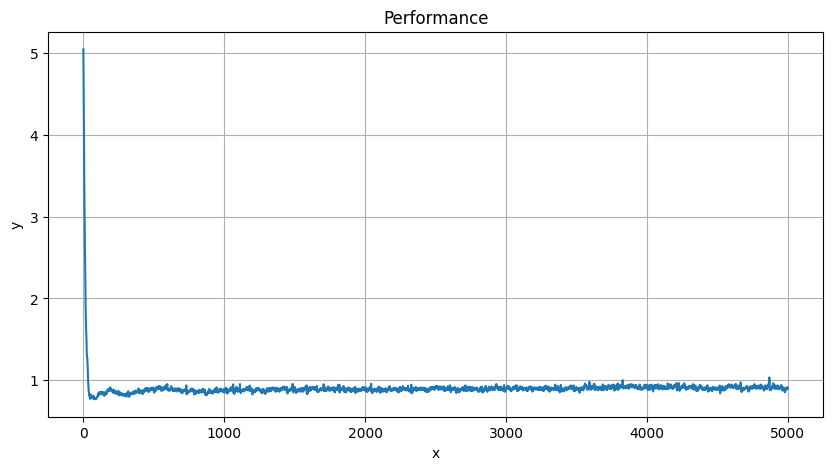

[5.04994432 4.84127306 4.58568912 ... 0.90924732 0.90056706 0.90021748]
Accuracy: 0.949438202247191
Precision: 0.9507756813417192
Recall: 0.9491525423728814
F1-Score: 0.9468429939638429


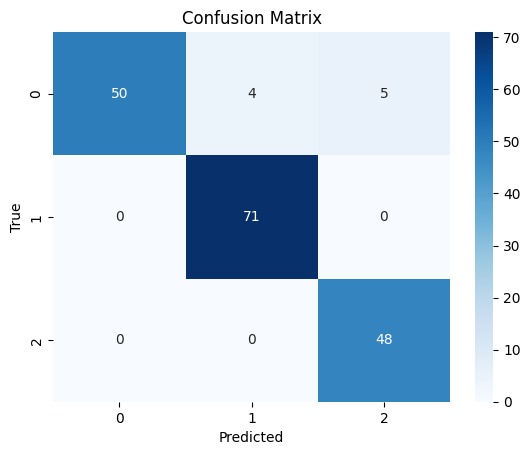

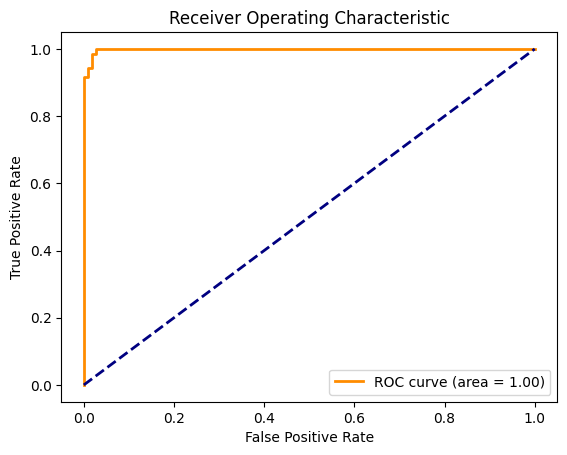

Final performance: 0.9002174778312203


In [375]:
if __name__ == '__main__':
    main()